<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Tirta Nurrochman Bintang Prawira
# No: 27
# Kelas: TI-3A
# NIM: 2241720045

# D. TUGAS PRAKTIKUM
1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.
- Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive

#Accesing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Kode ini mengimpor `drive` dari Google Colab untuk bisa mengakses Google Drive. Dengan `drive.mount('/content/drive')`, kamu menyambungkan Google Drive ke Colab dan file-drive-mu bakal muncul di folder `/content/drive`. Setelah itu, kamu akan diminta login dan memberikan izin akses. Begitu berhasil, kamu bisa baca atau simpan file dari Google Drive langsung lewat Colab. Sangat berguna kalau kamu butuh akses file dari Drive dalam notebook.

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [64]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob
import cv2

1. `cv2` untuk pengolahan gambar dengan OpenCV.
2. `cv2_imshow` untuk menampilkan gambar di Colab.
3. `skimage.io` buat baca gambar dari file atau URL.
4. `matplotlib.pyplot` untuk visualisasi gambar.
5. `numpy` untuk operasi array, `math` buat fungsi matematika.
6. `os` dan `glob` buat manajemen file dan pencarian gambar.

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)


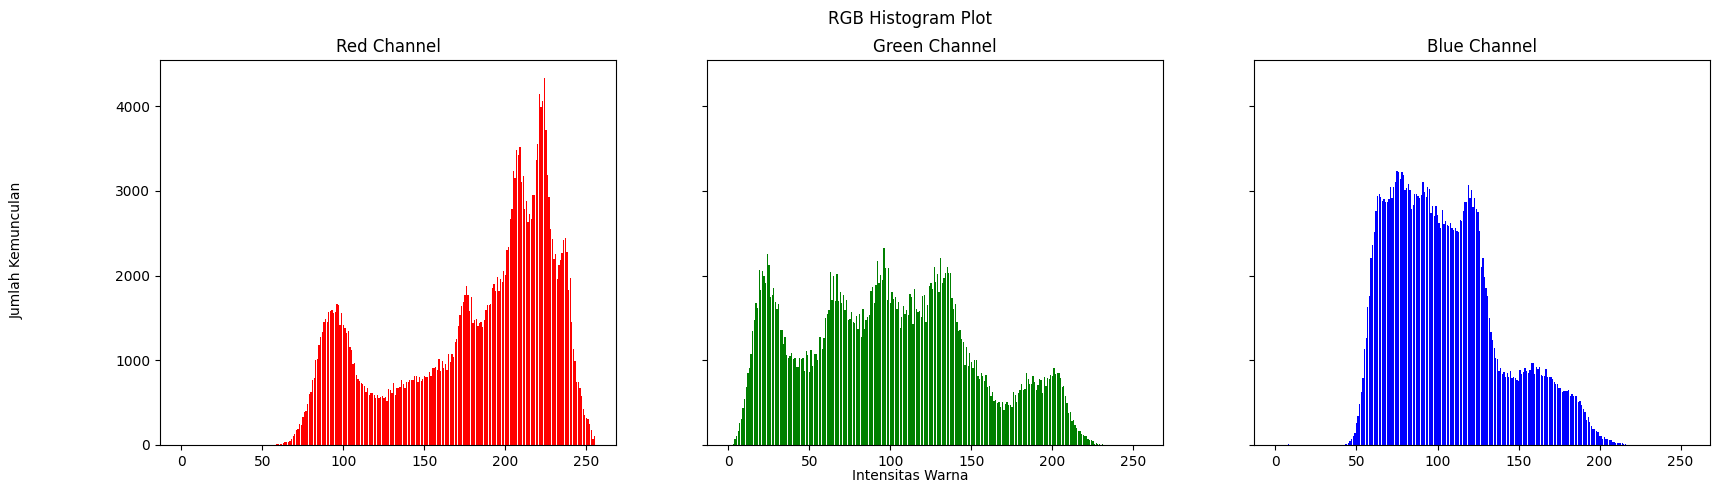

In [38]:
# Langkah 1: Input image
image = cv.imread('/content/drive/MyDrive/dataset/lena.png')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Langkah 2: Menghitung jumlah kemunculan intensitas warna untuk setiap channel
red_intensity, _ = np.histogram(image_rgb[:, :, 0], bins=256, range=(0, 256))
green_intensity, _ = np.histogram(image_rgb[:, :, 1], bins=256, range=(0, 256))
blue_intensity, _ = np.histogram(image_rgb[:, :, 2], bins=256, range=(0, 256))

# Langkah 3: Membuat histogram citra
color_range = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('RGB Histogram Plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(color_range, red_intensity, color='red')
axs[0].set_title('Red Channel')
axs[1].bar(color_range, green_intensity, color='green')
axs[1].set_title('Green Channel')
axs[2].bar(color_range, blue_intensity, color='blue')
axs[2].set_title('Blue Channel')

plt.show()

Langkah pertama, gambar dibaca dan diubah ke format RGB. Selanjutnya, histogram intensitas warna dihitung untuk setiap channel (merah, hijau, biru). Setiap channel (red, green, blue) dihitung jumlah kemunculan intensitas warna menggunakan `np.histogram`. Histogram untuk setiap channel ditampilkan menggunakan `matplotlib`, dengan sumbu X menunjukkan intensitas warna dan Y menunjukkan jumlah kemunculan. Akhirnya, tiga histogram warna (RGB) ditampilkan berdampingan untuk visualisasi.

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

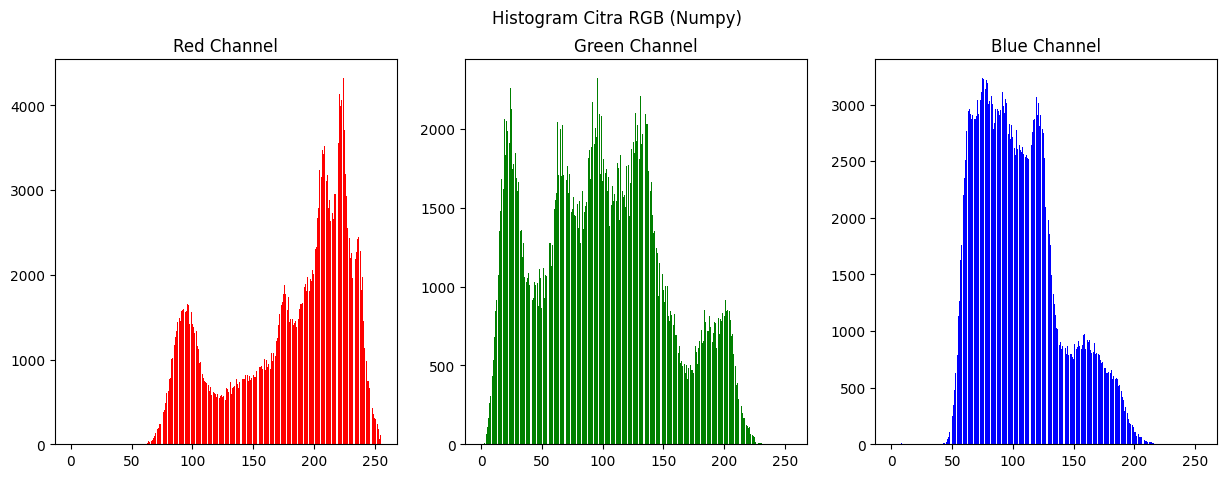

In [39]:
# Langkah 1: Input image dan konversi ke RGB
image = cv.imread('/content/drive/MyDrive/dataset/lena.png')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Langkah 2: Menghitung histogram menggunakan np.histogram untuk setiap channel
red_hist, _ = np.histogram(image_rgb[:, :, 0], bins=256, range=(0, 256))
green_hist, _ = np.histogram(image_rgb[:, :, 1], bins=256, range=(0, 256))
blue_hist, _ = np.histogram(image_rgb[:, :, 2], bins=256, range=(0, 256))

# Langkah 3: Plot histogram RGB
color_range = np.arange(256)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(color_range, red_hist, color='red')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.bar(color_range, green_hist, color='green')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.bar(color_range, blue_hist, color='blue')
plt.title('Blue Channel')

plt.suptitle('Histogram Citra RGB (Numpy)')
plt.show()


Langkah pertama, gambar dibaca dan dikonversi ke format RGB. Kemudian, histogram intensitas warna dihitung untuk masing-masing channel (merah, hijau, biru) menggunakan `np.histogram`. Setiap histogram channel digambarkan menggunakan `matplotlib` dalam tiga subplot terpisah. Setiap subplot mewakili satu channel (Red, Green, Blue) dengan intensitas warna di sumbu X dan frekuensinya di sumbu Y. Terakhir, judul utama ditambahkan dan histogram ditampilkan sebagai plot.

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

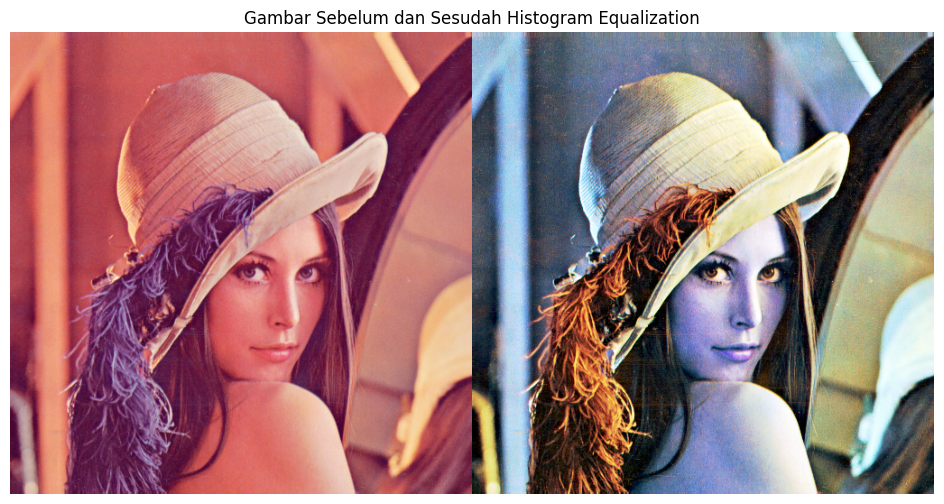

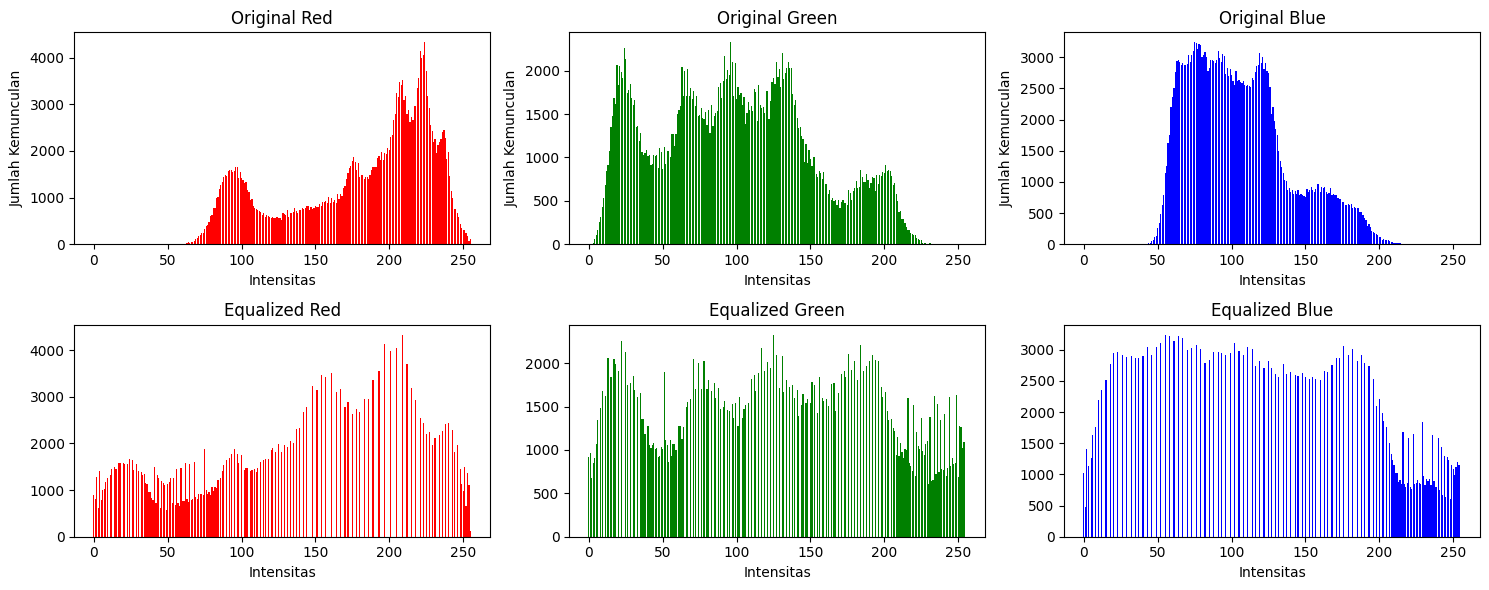

In [44]:
# Input Image: Baca gambar input dan konversi ke RGB
image = cv.imread('/content/drive/MyDrive/dataset/lena.png')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Langkah 1: Input Image

# Fungsi untuk menghitung frekuensi pixel dan menghasilkan channel yang sudah di-equalize
def getEqualizedImage(image_channel):
    # Langkah 2: Menghitung jumlah kemunculan setiap pixel warna (Frekuensi)
    frequency = np.bincount(image_channel.flatten(), minlength=256)

    # Langkah 3: Penjumlahan kumulatif dari frekuensi yang sudah diketahui, kemudian dibagi dengan jumlah pixel
    normalized_cumsum = np.cumsum(frequency) / image_channel.size

    # Langkah 4: Normalisasi dengan kumulatif frekuensi seluruh pixel (Skala 0-255)
    equalized_channel = np.uint8(normalized_cumsum[image_channel] * 255)

    return equalized_channel, frequency

# Langkah 5: Pisahkan channel, hitung equalized channel, dan buat gambar baru
R_eq, freq_R = getEqualizedImage(image_rgb[:,:,0])  # Equalization untuk channel Merah
G_eq, freq_G = getEqualizedImage(image_rgb[:,:,1])  # Equalization untuk channel Hijau
B_eq, freq_B = getEqualizedImage(image_rgb[:,:,2])  # Equalization untuk channel Biru

# Langkah 6: Gabungkan channel equalized menjadi gambar baru
new_image = cv.merge([B_eq, G_eq, R_eq])

# Gabungkan gambar asli dan hasil equalization
final_frame = cv.hconcat([image_rgb, new_image])

# Tampilkan gambar sebelum dan sesudah histogram equalization
plt.figure(figsize=(12, 6))
plt.imshow(final_frame)
plt.title("Gambar Sebelum dan Sesudah Histogram Equalization")
plt.axis('off')
plt.show()

# Langkah 7: Tampilkan histogram sebelum dan sesudah equalization
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Histogram gambar asli
for ax, freq, color, title in zip(axes[0], [freq_R, freq_G, freq_B], ['red', 'green', 'blue'], ['Red', 'Green', 'Blue']):
    ax.bar(np.arange(256), freq, color=color)
    ax.set_title(f'Original {title}')
    ax.set_xlabel('Intensitas')
    ax.set_ylabel('Jumlah Kemunculan')

# Histogram gambar hasil equalization
for ax, channel_eq, color, title in zip(axes[1], [R_eq, G_eq, B_eq], ['red', 'green', 'blue'], ['Red', 'Green', 'Blue']):
    ax.bar(np.arange(256), np.bincount(channel_eq.flatten(), minlength=256), color=color)
    ax.set_title(f'Equalized {title}')
    ax.set_xlabel('Intensitas')

plt.tight_layout()
plt.show()


Langkah pertama, gambar dibaca dan diubah menjadi format RGB. Kemudian, dibuat fungsi `getEqualizedImage()` untuk menghitung frekuensi pixel dan melakukan histogram equalization pada setiap channel warna (merah, hijau, biru). Frekuensi pixel dihitung menggunakan `np.bincount`, lalu di-normalisasi dengan kumulatif distribusi frekuensi. Setiap channel yang sudah di-equalize digabungkan kembali menjadi gambar baru. Hasilnya dibandingkan dengan gambar asli melalui tampilan gambar dan histogram sebelum serta setelah equalization, yang memperlihatkan perubahan distribusi intensitas warna.

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?


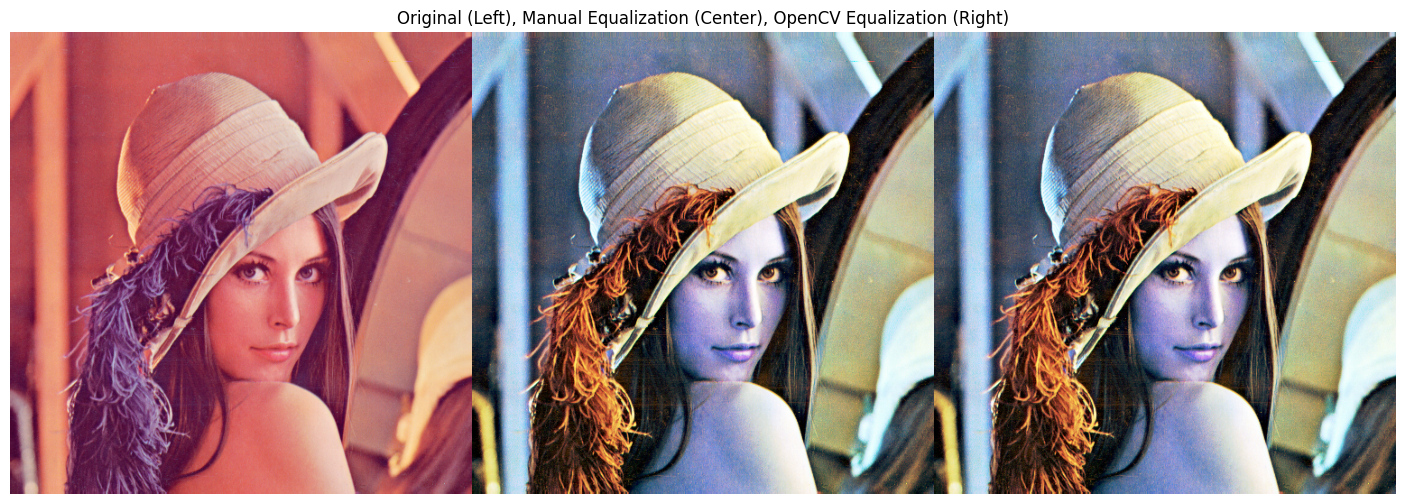

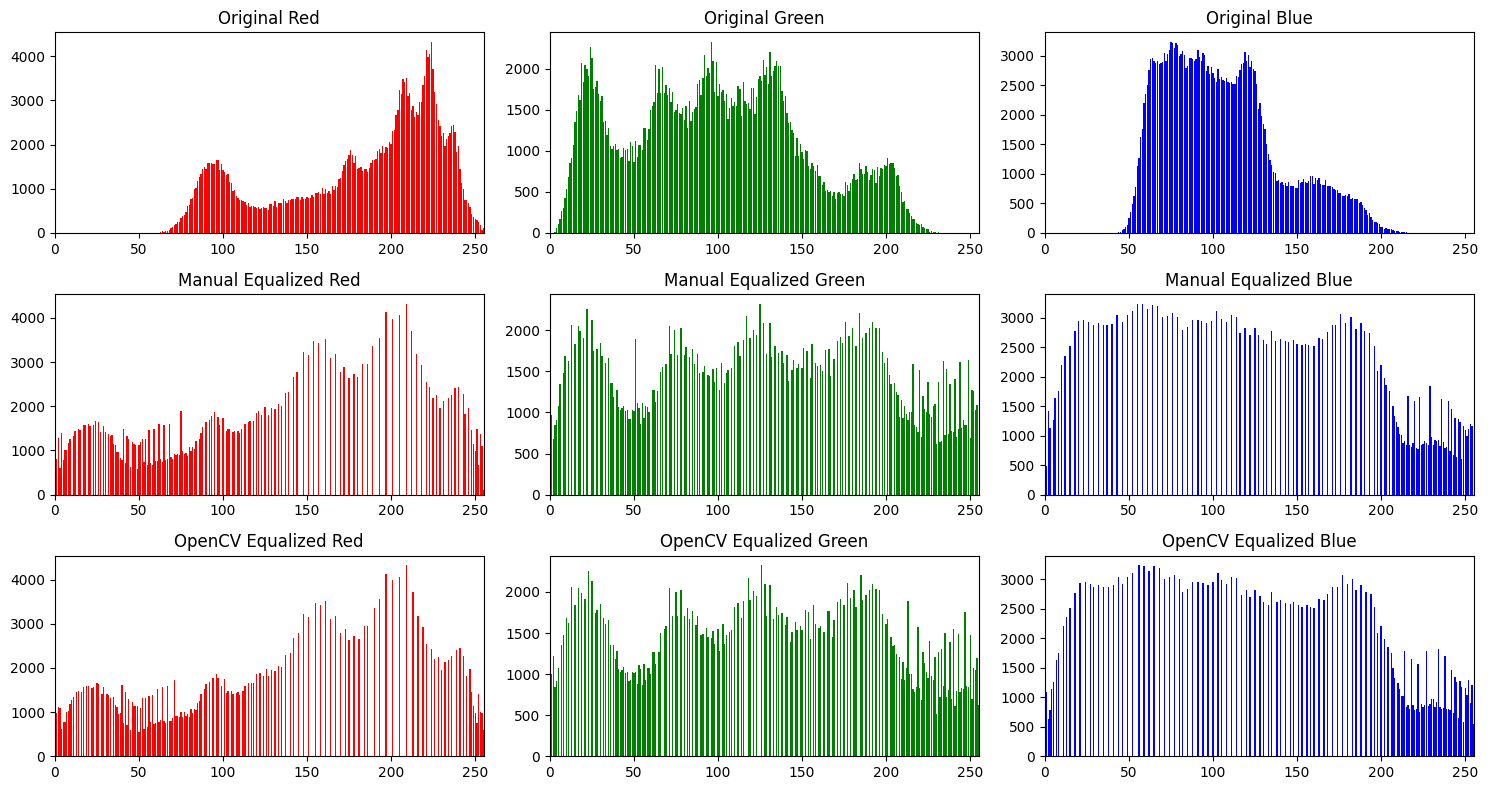

In [49]:
# Baca dan konversi gambar ke RGB
image = cv.imread('/content/drive/MyDrive/dataset/lena.png')  # Ganti path sesuai lokasi file Anda
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Fungsi untuk manual equalization
def manual_equalization(channel):
    hist, _ = np.histogram(channel.flatten(), bins=256, range=[0,256])
    cdf = hist.cumsum()  # Cumulative Distribution Function (CDF)
    cdf_normalized = cdf / cdf[-1]  # Normalisasi CDF
    equalized_channel = np.uint8(cdf_normalized[channel] * 255)  # Buat channel yang sudah di-equalize
    return equalized_channel

# Pisahkan channel RGB dan lakukan equalization manual
R_eq_manual = manual_equalization(image_rgb[:,:,0])
G_eq_manual = manual_equalization(image_rgb[:,:,1])
B_eq_manual = manual_equalization(image_rgb[:,:,2])
manual_image = cv.merge([B_eq_manual, G_eq_manual, R_eq_manual])

# Lakukan equalization menggunakan OpenCV (cv.equalizeHist)
R_eq_cv = cv.equalizeHist(image_rgb[:,:,0])
G_eq_cv = cv.equalizeHist(image_rgb[:,:,1])
B_eq_cv = cv.equalizeHist(image_rgb[:,:,2])
opencv_image = cv.merge([B_eq_cv, G_eq_cv, R_eq_cv])

# Gabungkan gambar asli, hasil manual, dan hasil cv.equalizeHist
combined_image = cv.hconcat([image_rgb, manual_image, opencv_image])
plt.figure(figsize=(18, 6))
plt.imshow(combined_image)
plt.title("Original (Left), Manual Equalization (Center), OpenCV Equalization (Right)")
plt.axis('off')
plt.show()

# Fungsi untuk menampilkan histogram
def plot_histogram(channel, title, color, ax):
    hist, _ = np.histogram(channel.flatten(), bins=256, range=[0,256])
    ax.bar(np.arange(256), hist, color=color)
    ax.set_title(title)
    ax.set_xlim([0, 255])

# Tampilkan histogram sebelum dan sesudah equalization
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# Histogram gambar asli
plot_histogram(image_rgb[:,:,0], 'Original Red', 'red', axes[0,0])
plot_histogram(image_rgb[:,:,1], 'Original Green', 'green', axes[0,1])
plot_histogram(image_rgb[:,:,2], 'Original Blue', 'blue', axes[0,2])

# Histogram hasil equalization manual
plot_histogram(R_eq_manual, 'Manual Equalized Red', 'red', axes[1,0])
plot_histogram(G_eq_manual, 'Manual Equalized Green', 'green', axes[1,1])
plot_histogram(B_eq_manual, 'Manual Equalized Blue', 'blue', axes[1,2])

# Histogram hasil equalization OpenCV
plot_histogram(R_eq_cv, 'OpenCV Equalized Red', 'red', axes[2,0])
plot_histogram(G_eq_cv, 'OpenCV Equalized Green', 'green', axes[2,1])
plot_histogram(B_eq_cv, 'OpenCV Equalized Blue', 'blue', axes[2,2])

plt.tight_layout()
plt.show()


Pada kode ini, gambar pertama-tama dibaca dan dikonversi ke RGB. Fungsi `manual_equalization()` digunakan untuk melakukan histogram equalization secara manual pada setiap channel RGB, menghitung frekuensi, kumulatif distribusi (CDF), dan mengubah intensitas pixel. Gambar hasil equalization manual digabungkan dengan hasil equalization menggunakan `cv.equalizeHist()` dari OpenCV untuk perbandingan. Kemudian, gambar-gambar tersebut ditampilkan berdampingan (asli, manual, dan OpenCV) untuk visualisasi. Selain itu, histogram untuk setiap channel RGB ditampilkan sebelum dan setelah equalization untuk memperlihatkan perubahan distribusi intensitas.

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

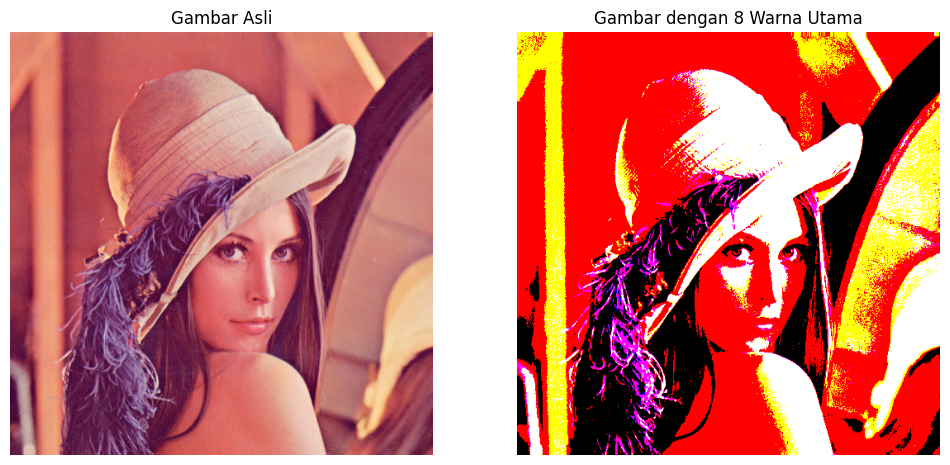

In [57]:
# Fungsi untuk memetakan warna RGB ke dalam 8 warna utama
def map_color(pixel):
    R, G, B = pixel[2], pixel[1], pixel[0]  # Urutan channel OpenCV: BGR
    # Menerapkan thresholding untuk memetakan ke dalam 8 warna utama
    R = 255 if R > 127 else 0
    G = 255 if G > 127 else 0
    B = 255 if B > 127 else 0

    # Memetakan warna RGB ke 8 warna utama
    if R == 0 and G == 0 and B == 0:
        return [0, 0, 0]  # Black
    elif R == 255 and G == 0 and B == 0:
        return [0, 0, 255]  # Red
    elif R == 0 and G == 255 and B == 0:
        return [0, 255, 0]  # Green
    elif R == 0 and G == 0 and B == 255:
        return [255, 0, 0]  # Blue
    elif R == 255 and G == 255 and B == 0:
        return [0, 255, 255]  # Yellow
    elif R == 0 and G == 255 and B == 255:
        return [255, 255, 0]  # Cyan
    elif R == 255 and G == 0 and B == 255:
        return [255, 0, 255]  # Magenta
    elif R == 255 and G == 255 and B == 255:
        return [255, 255, 255]  # White
    else:
        return [0, 0, 0]  # Default ke hitam jika tidak sesuai

# Membaca gambar asli
original_image = cv.imread('/content/drive/MyDrive/dataset/lena.png')

# Membuat gambar hasil dengan ukuran yang sama dengan gambar asli
mapped_image = np.zeros_like(original_image)

# Memetakan setiap pixel pada gambar asli ke dalam 8 warna utama
for y in range(original_image.shape[0]):
    for x in range(original_image.shape[1]):
        mapped_image[y, x] = map_color(original_image[y, x])

# Menampilkan gambar asli dan gambar hasil pemetaan
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
ax[0].set_title('Gambar Asli')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(mapped_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Gambar dengan 8 Warna Utama')
ax[1].axis('off')

plt.show()


Kode ini memetakan gambar ke dalam 8 warna utama berdasarkan nilai intensitas RGB dengan thresholding. Fungsi `map_color()` akan mengubah setiap pixel di gambar menjadi salah satu dari 8 warna dasar (hitam, merah, hijau, biru, kuning, cyan, magenta, putih). Gambar asli dibaca dan kemudian diproses pixel per pixel untuk menghasilkan gambar baru yang hanya memiliki 8 warna utama. Hasilnya, dua gambar ditampilkan berdampingan: gambar asli dan gambar yang sudah dipetakan ke 8 warna utama.

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

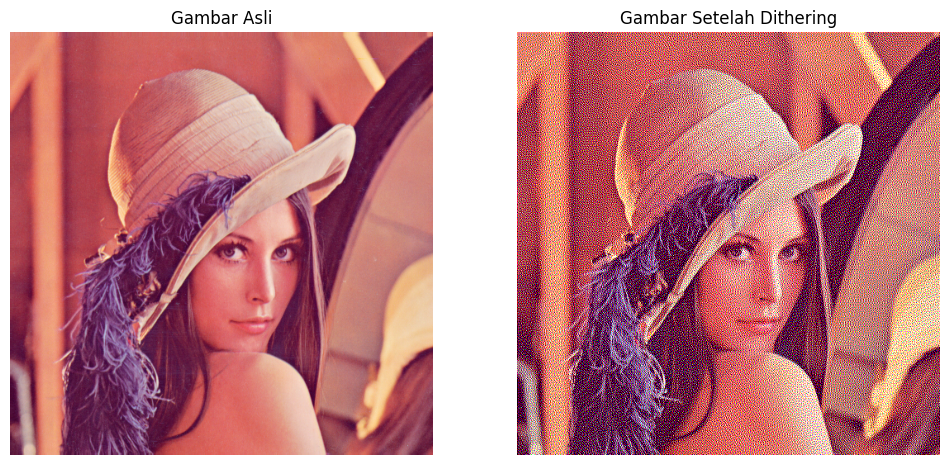

In [60]:
# Membaca gambar asli
image = cv.imread('/content/drive/MyDrive/dataset/lena.png')
b, g, r = cv.split(image)  # Memisahkan channel B, G, R

# Menerapkan dithering Floyd-Steinberg pada setiap channel
for channel in [b, g, r]:
    for y in range(channel.shape[0]):
        for x in range(channel.shape[1]):
            old_value = channel[y, x]
            new_value = 255 if old_value > 128 else 0
            error = old_value - new_value
            channel[y, x] = new_value

            # Distribusi error ke tetangga
            if x < channel.shape[1] - 1:
                channel[y, x + 1] = np.clip(channel[y, x + 1] + error * 7 / 16, 0, 255)
            if x > 0 and y < channel.shape[0] - 1:
                channel[y + 1, x - 1] = np.clip(channel[y + 1, x - 1] + error * 3 / 16, 0, 255)
            if y < channel.shape[0] - 1:
                channel[y + 1, x] = np.clip(channel[y + 1, x] + error * 5 / 16, 0, 255)
            if y < channel.shape[0] - 1 and x < channel.shape[1] - 1:
                channel[y + 1, x + 1] = np.clip(channel[y + 1, x + 1] + error * 1 / 16, 0, 255)

# Gabungkan channel yang telah dithered
dithered_image = cv.merge([b, g, r])

# Menampilkan gambar asli dan hasil dithering
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Gambar Asli')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(dithered_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Gambar Setelah Dithering')
ax[1].axis('off')

plt.show()


Kode ini menerapkan teknik dithering Floyd-Steinberg pada setiap channel RGB gambar untuk menghasilkan efek penurunan kualitas yang lebih halus. Proses dimulai dengan memisahkan channel warna (B, G, R) dan kemudian untuk setiap pixel, nilai warnanya diubah menjadi 0 atau 255 berdasarkan ambang batas (threshold). Selanjutnya, error (selisih antara nilai asli dan nilai yang baru) didistribusikan ke tetangga-tetangga pixel menggunakan aturan distribusi Floyd-Steinberg. Gambar hasil dithering kemudian digabungkan kembali dan ditampilkan berdampingan dengan gambar asli untuk perbandingan visual.

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!


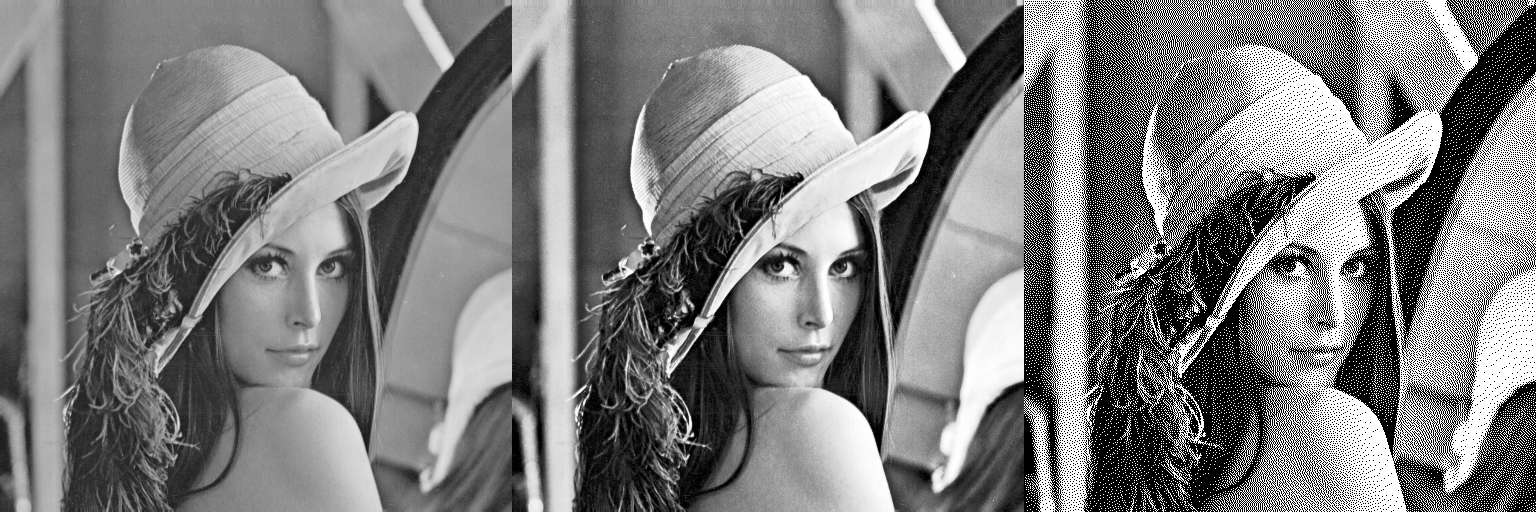

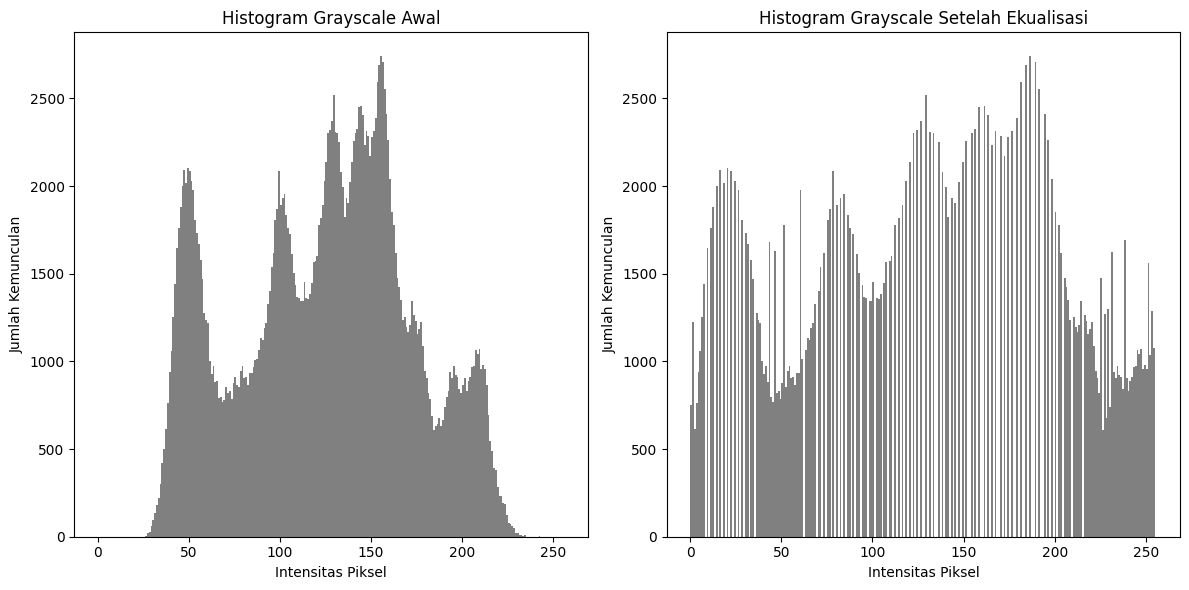

In [81]:
from google.colab.patches import cv2_imshow

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/dataset/lena.png')

# Mengubah gambar menjadi grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Fungsi untuk menghitung histogram dan melakukan ekualisasi
def equalize_histogram(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            pixel = img[y, x]
            hist[pixel] += 1
    cdf = np.cumsum(hist)
    cdf_normalized = cdf / (height * width)
    transform_map = np.floor(255 * cdf_normalized).astype(np.uint8)
    img_eq = np.zeros((height, width), dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            img_eq[y, x] = transform_map[img[y, x]]
    return img_eq

# Ekualisasi histogram
equalized_image = equalize_histogram(gray_image)

# Fungsi untuk menerapkan dithering Floyd-Steinberg dengan maksimal
def floyd_steinberg_dithering(img):
    height, width = img.shape
    dithered_image = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_value = img[y, x]
            # Ubah threshold agar lebih banyak tingkat warna
            if old_value >= 128:
                new_value = 255
            else:
                new_value = 0

            dithered_image[y, x] = new_value
            error = old_value - new_value

            # Sebarkan error ke piksel tetangga
            if x < width - 1:
                img[y, x + 1] = np.clip(img[y, x + 1] + error * 7 / 16, 0, 255)
            if x > 0 and y < height - 1:
                img[y + 1, x - 1] = np.clip(img[y + 1, x - 1] + error * 3 / 16, 0, 255)
            if y < height - 1:
                img[y + 1, x] = np.clip(img[y + 1, x] + error * 5 / 16, 0, 255)
            if y < height - 1 and x < width - 1:
                img[y + 1, x + 1] = np.clip(img[y + 1, x + 1] + error * 1 / 16, 0, 255)

    return dithered_image

# Menerapkan dithering
dithered_image = floyd_steinberg_dithering(equalized_image.copy())

# Menampilkan hasil
final_frame = cv.hconcat([gray_image, equalized_image, dithered_image])
cv2_imshow(final_frame)

# Plot histogram grayscale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Histogram Grayscale Awal')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Kemunculan')
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='gray')

plt.subplot(1, 2, 2)
plt.title('Histogram Grayscale Setelah Ekualisasi')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Kemunculan')
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='gray')

plt.tight_layout()
plt.show()


Pada kode ini, gambar dibaca dan diubah menjadi grayscale. Fungsi `equalize_histogram()` diterapkan untuk melakukan ekualisasi histogram pada gambar, yang memperbaiki kontras dengan menyebarkan distribusi pixel lebih merata. Kemudian, teknik Floyd-Steinberg dithering diterapkan pada gambar yang telah diekualisasi untuk mengubahnya menjadi gambar biner dengan error yang didistribusikan ke pixel tetangga. Gambar asli, hasil ekualisasi, dan hasil dithering ditampilkan berdampingan. Selain itu, dua histogram (sebelum dan setelah ekualisasi) ditampilkan untuk memperlihatkan perubahan distribusi intensitas pixel pada gambar grayscale.

# Tugas Flowchart

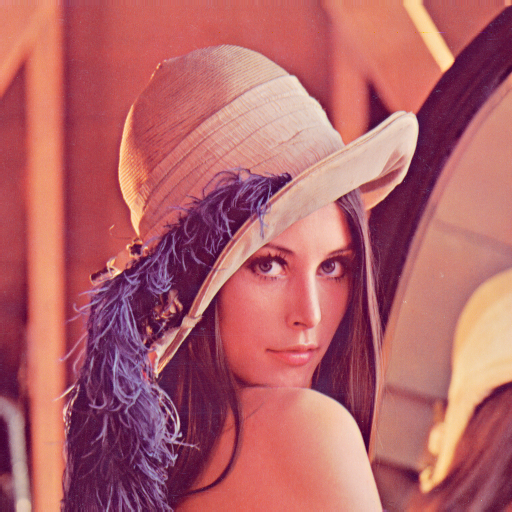

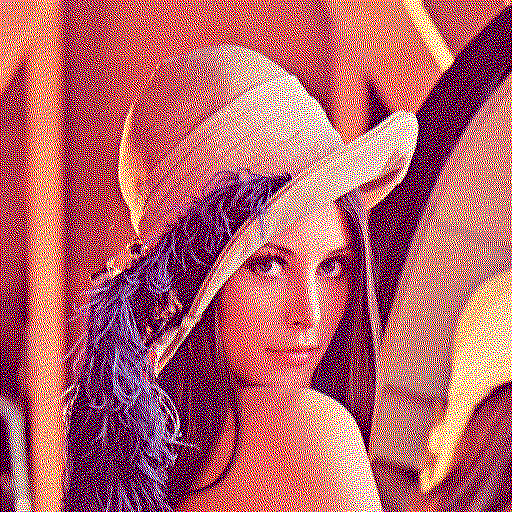

In [84]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow  # Menggunakan cv2_imshow untuk Colab

# Fungsi threshold sesuai flowchart (bagian threshold warna)
def threshold(pixel_value):
    return 255 if pixel_value > 127 else 0

# Fungsi Floyd-Steinberg Dithering utama (proses utama pada flowchart)
def floyd_steinberg_dithering(img):
    height, width, _ = img.shape
    dithered_image = img.copy().astype(np.float32)  # Salin gambar asli untuk simpan error

    for y in range(height):
        for x in range(width):
            # Ambil nilai pixel untuk setiap channel (Red, Green, Blue)
            pixel_blue_old = dithered_image[y, x, 0]  # Nilai pixel Blue lama
            pixel_green_old = dithered_image[y, x, 1]  # Nilai pixel Green lama
            pixel_red_old = dithered_image[y, x, 2]  # Nilai pixel Red lama

            # Terapkan thresholding untuk setiap channel
            pixel_blue_new = threshold(pixel_blue_old)
            pixel_green_new = threshold(pixel_green_old)
            pixel_red_new = threshold(pixel_red_old)

            # Update pixel setelah thresholding
            dithered_image[y, x, 0] = pixel_blue_new
            dithered_image[y, x, 1] = pixel_green_new
            dithered_image[y, x, 2] = pixel_red_new

            # Hitung error untuk setiap channel
            error_blue = pixel_blue_old - pixel_blue_new
            error_green = pixel_green_old - pixel_green_new
            error_red = pixel_red_old - pixel_red_new

            # Distribusi error ke tetangga menggunakan rumus Floyd-Steinberg
            if x < width - 1:  # Piksel kanan
                dithered_image[y, x + 1, 0] += error_blue * 7 / 16
                dithered_image[y, x + 1, 1] += error_green * 7 / 16
                dithered_image[y, x + 1, 2] += error_red * 7 / 16

            if x > 0 and y < height - 1:  # Piksel kiri bawah
                dithered_image[y + 1, x - 1, 0] += error_blue * 3 / 16
                dithered_image[y + 1, x - 1, 1] += error_green * 3 / 16
                dithered_image[y + 1, x - 1, 2] += error_red * 3 / 16

            if y < height - 1:  # Piksel bawah
                dithered_image[y + 1, x, 0] += error_blue * 5 / 16
                dithered_image[y + 1, x, 1] += error_green * 5 / 16
                dithered_image[y + 1, x, 2] += error_red * 5 / 16

            if x < width - 1 and y < height - 1:  # Piksel kanan bawah
                dithered_image[y + 1, x + 1, 0] += error_blue * 1 / 16
                dithered_image[y + 1, x + 1, 1] += error_green * 1 / 16
                dithered_image[y + 1, x + 1, 2] += error_red * 1 / 16

    # Pastikan piksel berada dalam rentang [0, 255] dan kembali ke uint8
    return np.clip(dithered_image, 0, 255).astype(np.uint8)

# Baca gambar input (bagian input gambar)
image = cv.imread('/content/drive/MyDrive/dataset/lena.png')  # Ganti dengan path gambar yang sesuai

# Proses dithering (bagian pemrosesan utama)
dithered_image = floyd_steinberg_dithering(image)

# Menampilkan gambar asli dan hasil dithering (bagian akhir flowchart)
cv2_imshow(image)  # Menggunakan cv2_imshow di Colab
cv2_imshow(dithered_image)  # Menampilkan gambar yang sudah di-dithering


Pada kode ini, Floyd-Steinberg Dithering diterapkan pada gambar dengan cara yang lebih terperinci. Berikut penjelasan setiap bagian kode:

1. **Thresholding**: Fungsi `threshold()` digunakan untuk mengubah setiap nilai pixel menjadi 0 atau 255 berdasarkan nilai threshold 127. Jika nilai pixel lebih besar dari 127, maka pixel tersebut diubah menjadi 255, sebaliknya menjadi 0.

2. **Floyd-Steinberg Dithering**: Pada fungsi `floyd_steinberg_dithering()`, setiap pixel diproses satu per satu untuk:
   - Melakukan thresholding pada setiap channel warna (Red, Green, Blue).
   - Menghitung error antara nilai pixel asli dan nilai pixel setelah thresholding.
   - Menyebarkan error ke tetangga-tetangga pixel berdasarkan aturan distribusi error Floyd-Steinberg, yang memperbaiki hasil dithering di area sekitar pixel yang sedang diproses.

3. **Tampilkan Hasil**: Menggunakan `cv2_imshow()` untuk menampilkan gambar asli dan gambar hasil dithering di Google Colab.

Dengan demikian, gambar yang telah di-dithering akan memiliki tampilan yang lebih sederhana dan kontras, dengan distribusi error yang merata ke piksel sekitar, menciptakan efek gradasi yang lebih halus.